In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from collections import Counter

import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

In [12]:
DATA_FOLDER = '../data'

In [43]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 1, 28, 28)

    return images, labels

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
        
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(12, 12))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [44]:
im_train, label_train = load_mnist(DATA_FOLDER)

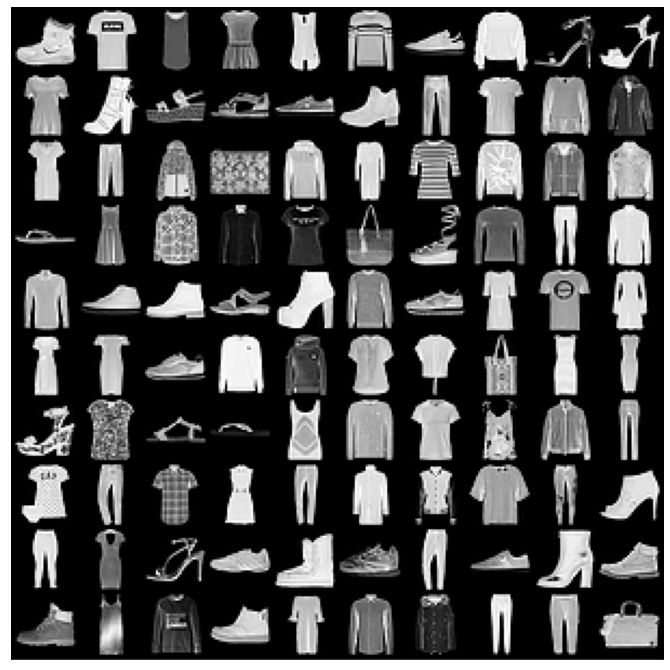

In [47]:
show(make_grid(torch.tensor(im_train[:100]), nrow=10))

In [35]:
Counter(label_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})